<a href="https://colab.research.google.com/github/Lorenzo1208/Brief_fao/blob/main/FAO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Analyses descriptives des donn√©es



In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
#importations des diff√©rents csv dans des dataframes
animals_df = pd.read_csv('https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_animal.csv')
#nommage des colonnes pour que ce soit homog√®ne dans tous les df pour pouvoir les concatener
animals_df.rename(columns={'Code Domaine':'Code_Domaine', 'Code Pays': 'Code_Pays','Code √âl√©ment	':'Code_√âl√©ment', 'Code Produit': 'Code_Produit', 'Valeur': 'quantit√©',  'Code Ann√©e':'Code_Ann√©e', 'Description du Symbole': 'Description_du_Symbole'}, inplace=True)
# animals_df    

In [353]:
#on fait la m√™me chose avec tous les csv
cereals_df = pd.read_csv('https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_cereal.csv')
cereals_df.rename(columns={'Code Domaine':'Code_Domaine', 'Code Pays': 'Code_Pays','Code √âl√©ment	':'Code_√âl√©ment', 'Code Produit': 'Code_Produit', 'Code Ann√©e':'Code_Ann√©e', 'Description du Symbole': 'Description_du_Symbole'}, inplace=True)
# cereals_df.head()

In [354]:
population_df = pd.read_csv('https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_population.csv')
population_df.rename(columns={'Domain Code':'Code_Domaine','Domain':'Domaine', 'Country Code': 'Code_Pays','Element Code':'Code_√âl√©ment', 'Element':'√âl√©ment','Item Code': 'Code_Produit', 'Item':'Produit', 'Year Code':'Code_Ann√©e','Year': 'Ann√©e' , 'Country': 'Pays', 'Unit': 'Unit√©', 'Value': 'population','Flag':'Symbole', 'Flag Description': 'Description_du_Symbole'}, inplace=True)
# population_df.head()

In [355]:
sous_alimentation_df = pd.read_csv('https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_sous_alimentation.csv')
sous_alimentation_df.rename(columns={'Code Domaine':'Code_Domaine','Zone':'Pays', 'Code Pays': 'Code_Pays','Code √âl√©ment	':'Code_√âl√©ment', 'Code Produit': 'Code_Produit', 'Code Ann√©e':'Code_Ann√©e', 'Description du Symbole': 'Description_du_Symbole'}, inplace=True)
# sous_alimentation_df.head()

In [356]:
#on compare les tailles des diff√©rents dataframes
print(animals_df.shape)
print(cereals_df.shape)
print(population_df.shape)
print(sous_alimentation_df.shape)

(37166, 14)
(16057, 14)
(175, 14)
(204, 14)


In [357]:
type(population_df)

pandas.core.frame.DataFrame

In [358]:
population_df.count()

Code_Domaine              175
Domaine                   175
Code_Pays                 175
Pays                      175
Code_√âl√©ment              175
√âl√©ment                   175
Code_Produit              175
Produit                   175
Code_Ann√©e                175
Ann√©e                     175
Unit√©                     175
population                175
Symbole                     1
Description_du_Symbole    175
dtype: int64

In [359]:
list(population_df.columns)

['Code_Domaine',
 'Domaine',
 'Code_Pays',
 'Pays',
 'Code_√âl√©ment',
 '√âl√©ment',
 'Code_Produit',
 'Produit',
 'Code_Ann√©e',
 'Ann√©e',
 'Unit√©',
 'population',
 'Symbole',
 'Description_du_Symbole']

In [360]:
population_df[["population"]].describe().round(2)

population
count      175.00
mean     48079.96
std     178632.74
min         54.00
25%       2543.50
50%       9413.00
75%      28881.50
max    1416667.00

In [361]:
#on regarde les statistiques de la colonne "population", notamment pour obtenir la valeur max
population_df.population.describe()

count    1.750000e+02
mean     4.807996e+04
std      1.786327e+05
min      5.400000e+01
25%      2.543500e+03
50%      9.413000e+03
75%      2.888150e+04
max      1.416667e+06
Name: population, dtype: float64

In [362]:
animals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37166 entries, 0 to 37165
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code_Domaine            37166 non-null  object 
 1   Domaine                 37166 non-null  object 
 2   Code_Pays               37166 non-null  int64  
 3   Pays                    37166 non-null  object 
 4   Code √âl√©ment            37166 non-null  int64  
 5   √âl√©ment                 37166 non-null  object 
 6   Code_Produit            37166 non-null  int64  
 7   Produit                 37166 non-null  object 
 8   Code_Ann√©e              37166 non-null  int64  
 9   Ann√©e                   37166 non-null  int64  
 10  Unit√©                   37166 non-null  object 
 11  quantit√©                37166 non-null  float64
 12  Symbole                 37166 non-null  object 
 13  Description_du_Symbole  37166 non-null  object 
dtypes: float64(1), int64(5), objec

In [363]:
population_df.columns

Index(['Code_Domaine', 'Domaine', 'Code_Pays', 'Pays', 'Code_√âl√©ment',
       '√âl√©ment', 'Code_Produit', 'Produit', 'Code_Ann√©e', 'Ann√©e', 'Unit√©',
       'population', 'Symbole', 'Description_du_Symbole'],
      dtype='object')

In [364]:
vegetal_df.columns

Index(['Code_Domaine', 'Domaine', 'Code_Pays', 'Pays', 'Code_√âl√©ment',
       '√âl√©ment', 'Code_Produit', 'Produit', 'Code_Ann√©e', 'Ann√©e', 'Unit√©',
       'quantit√©', 'Symbole', 'Description_du_Symbole', 'Origine'],
      dtype='object')

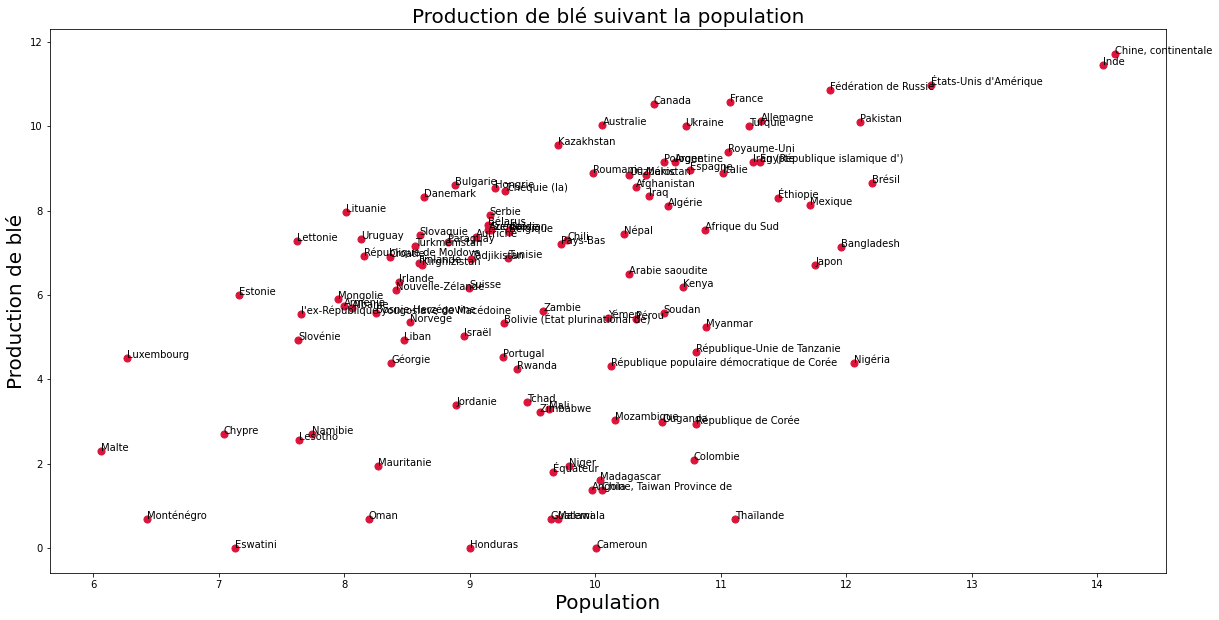

In [433]:

#on effectue un tri sur les lignes dont la colonne √©l√©ment correspond √† production    
selection = cereals_df['√âl√©ment'] == 'Production'
#print(selection)
cereals_df2 = cereals_df[selection]

#deuxi√®me tri sur les lignes dont la colonne produit correspond √† bl√©
cereals_df2 = cereals_df2[cereals_df2['Produit'] == 'Bl√©']
#on filtre les valeus nulles pour √©viter les divisions par 0
cereals_df2 = cereals_df2[cereals_df2['Valeur'] > 0]
#on extrait uniquement les colonnes valeur et code pays
cereals_df2 = cereals_df2[["Valeur", "Pays", "Code_Pays"]]
#print(df_cereal)

#df_population.index = df_population['Code Pays']

population_df3 = population_df[["population", "Code_Pays"]]
#print(df_population)

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
#on joint les deux df avec 'code pays' comme index et on pr√©cise le nom des tableaux pour les colonnes valeur
df_graph = cereals_df2.set_index('Code_Pays').join(population_df3.set_index('Code_Pays'), lsuffix="_cereal", rsuffix="_population")


#on fait un graphique scatter plot avec les valeurs x et y qui nous int√©ressent
#log permet de tasser en enlevant la puissance
graph = plt.scatter(np.log(df_graph["population"]), np.log(df_graph['Valeur']), color='crimson', s=50)

#ajouter le nom des pays √† c√¥t√© de chaque point en itt√©rant sur les lignes et non les colonnes
#on applique √©galement la fonction log pour que les noms aient la m√™me distribution que les points
for i, x in df_graph.iterrows():
    plt.annotate(x['Pays'], (np.log(x['population']), np.log(x['Valeur'])))

#afficher dans le terminal
# plt.figure(figsize=(15, 10))
plt.xlabel('Population',fontsize=20)
plt.ylabel('Production de bl√©',fontsize=20)
plt.title("Production de bl√© suivant la population", fontsize=20)
plt.show()

# ‚úÖ Question 1 : Nombre d'humains sur la plan√®te 

In [366]:
#on r√©cup√©re le total de la population mondiale
sum_of_column = population_df['population'].sum()
print(sum_of_column*1000)
# l'unit√© est en millier de personnes donc on multiplie par 1000

8413993000


# Selon wikipedia en 2013 nous √©tions 7,17 Milliards d'habitants et la Chine comptait 1,3 Mds d'habitants. Comment expliquer les 8 413 993 000 ?

In [367]:
population_df['population'].duplicated().value_counts()
#pas de duplicata
#175 pays dans le csv

False    175
Name: population, dtype: int64

In [368]:
#on cherche √† conna√Ætre les pays avec la plus grande population
population_df.sort_values(by='population', ascending=False).head()

Code_Domaine              Domaine  Code_Pays                      Pays  \
174          FBS  Food Balance Sheets        351                     China   
34           FBS  Food Balance Sheets         41           China, mainland   
73           FBS  Food Balance Sheets        100                     India   
165          FBS  Food Balance Sheets        231  United States of America   
74           FBS  Food Balance Sheets        101                 Indonesia   

     Code_√âl√©ment                        √âl√©ment  Code_Produit     Produit  \
174           511  Total Population - Both sexes          2501  Population   
34            511  Total Population - Both sexes          2501  Population   
73            511  Total Population - Both sexes          2501  Population   
165           511  Total Population - Both sexes          2501  Population   
74            511  Total Population - Both sexes          2501  Population   

     Code_Ann√©e  Ann√©e         Unit√©  population Symbole  \
174        2013   2013  1000 persons     1416667       A   
34         2013   2013  1000 persons     1385567     NaN   
73         2013   2013  1000 persons     1252140     NaN   
165        2013   2013  1000 persons      320051     NaN   
74         2013   2013  1000 persons      249866     NaN   

                                Description_du_Symbole  
174  Aggregate, may include official, semi-official...  
34                                       Official data  
73                                       Official data  
165                                      Official data  
74                                       Official data

# La Chine √©tait compt√©e 2 fois, en effet il y avait la Chine et ses territoires semi-ind√©pendants (Hong kong, Macao, Ta√Øwan).On va donc supprimer la valeur totale et laisser les territoires semi-ind√©pendants.

In [369]:
#suppression de la ligne "Chine"
population_df.drop(population_df[population_df['Pays'] == 'China'].index, inplace=True)
sum_of_column = population_df['population'].sum()
population_mondiale = sum_of_column*1000
population_mondiale

6997326000

In [370]:
#suppression de la ligne "Chine" pour les autres dataframes
# cereals_df.drop(cereals_df[cereals_df['Pays'] == 'Chine'].index, inplace=True)
# animals_df.drop(animals_df[animals_df['Pays'] == 'Chine'].index, inplace=True)
# vegetal_df.drop(vegetal_df[vegetal_df['Pays'] == 'Chine'].index, inplace=True)

# Il manque encore environ 100 millions d'habitants mais ici il n'y a que 174 pays alors que l'ONU en reconna√Æt officiellement 194. Il manque donc peut-√™tre certains pays, comme le Vatican, Andorre, √† moins qu'il n'aient √©t√© compt√©s respectivement dans la population de l'Italie et de la France, mais nous manquons de donn√©es pour en √™tre s√ªrs. Nous allons donc partir du principe qu'il y avait 6 997 326 000 habitants.

# ‚úÖ Question 2 : Redondances

In [371]:
#on extrait les donn√©es concernant le bl√© en France et on affiche les 11 √©l√©ments qui nous int√©ressent
cereal_bl√©_df = cereals_df[(cereals_df.Pays == 'France') & (cereals_df.Produit == 'Bl√©')]
cereal_bl√©_df.head(11)

Code_Domaine              Domaine  Code_Pays    Pays  Code √âl√©ment  \
5415          FBS  Bilans Alimentaires         68  France          5511   
5416          FBS  Bilans Alimentaires         68  France          5611   
5417          FBS  Bilans Alimentaires         68  France          5072   
5418          FBS  Bilans Alimentaires         68  France          5911   
5419          FBS  Bilans Alimentaires         68  France          5301   
5420          FBS  Bilans Alimentaires         68  France          5521   
5421          FBS  Bilans Alimentaires         68  France          5527   
5422          FBS  Bilans Alimentaires         68  France          5123   
5423          FBS  Bilans Alimentaires         68  France          5131   
5424          FBS  Bilans Alimentaires         68  France          5154   
5425          FBS  Bilans Alimentaires         68  France          5142   

                       √âl√©ment  Code_Produit Produit  Code_Ann√©e  Ann√©e  \
5415                Production          2511     Bl√©        2013   2013   
5416   Importations - Quantit√©          2511     Bl√©        2013   2013   
5417        Variation de stock          2511     Bl√©        2013   2013   
5418   Exportations - Quantit√©          2511     Bl√©        2013   2013   
5419  Disponibilit√© int√©rieure          2511     Bl√©        2013   2013   
5420     Aliments pour animaux          2511     Bl√©        2013   2013   
5421                  Semences          2511     Bl√©        2013   2013   
5422                    Pertes          2511     Bl√©        2013   2013   
5423                Traitement          2511     Bl√©        2013   2013   
5424       Autres Utilisations          2511     Bl√©        2013   2013   
5425                Nourriture          2511     Bl√©        2013   2013   

                   Unit√©   Valeur Symbole Description_du_Symbole  
5415  Milliers de tonnes  38614.0       S  Donn√©es standardis√©es  
5416  Milliers de tonnes   2055.0       S  Donn√©es standardis√©es  
5417  Milliers de tonnes   1131.0       S  Donn√©es standardis√©es  
5418  Milliers de tonnes  21502.0       S  Donn√©es standardis√©es  
5419  Milliers de tonnes  20298.0       S  Donn√©es standardis√©es  
5420  Milliers de tonnes   7822.0       S  Donn√©es standardis√©es  
5421  Milliers de tonnes    748.0       S  Donn√©es standardis√©es  
5422  Milliers de tonnes    358.0       S  Donn√©es standardis√©es  
5423  Milliers de tonnes   1575.0       S  Donn√©es standardis√©es  
5424  Milliers de tonnes   2824.0       S  Donn√©es standardis√©es  
5425  Milliers de tonnes   6971.0       S  Donn√©es standardis√©es

# disponibilit√©Int√©rieure = (Nourriture+NourritureAnimaux+Semences+Pertes+Traitements+AutresUtilisations)=(Production+Importation+VariationDeStock)‚àíExportation

In [372]:
#on assigne √† chaque √©l√©ment sa valeur
cereal_bl√©_√©l√©ment = cereal_bl√©_df['√âl√©ment']
disponibilit√©_interieur = cereal_bl√©_df[cereal_bl√©_√©l√©ment == 'Disponibilit√© int√©rieure']['Valeur'].sum()
production = cereal_bl√©_df[cereal_bl√©_√©l√©ment == 'Production']['Valeur'].sum()
imports = cereal_bl√©_df[cereal_bl√©_√©l√©ment == 'Importations - Quantit√©']['Valeur'].sum()
exports = cereal_bl√©_df[cereal_bl√©_√©l√©ment == 'Exportations - Quantit√©']['Valeur'].sum()
stock_variation = cereal_bl√©_df[cereal_bl√©_√©l√©ment == 'Variation de stock']['Valeur'].sum()
semences = cereal_bl√©_df[cereal_bl√©_√©l√©ment == 'Semences']['Valeur'].sum()
nourriture_animaux = cereal_bl√©_df[cereal_bl√©_√©l√©ment == 'Aliments pour animaux']['Valeur'].sum()
nourriture = cereal_bl√©_df[cereal_bl√©_√©l√©ment == 'Nourriture']['Valeur'].sum()
pertes = cereal_bl√©_df[cereal_bl√©_√©l√©ment == 'Pertes']['Valeur'].sum()
traitement = cereal_bl√©_df[cereal_bl√©_√©l√©ment == 'Traitement']['Valeur'].sum()
autres = cereal_bl√©_df[cereal_bl√©_√©l√©ment == 'Autres Utilisations']['Valeur'].sum()
#on v√©rifie que la formule trouv√©e fonctionne dans le cas du bl√© en France
print('La disponibilit√© int√©rieure vaut : {}'.format(disponibilit√©_interieur))
print('Production + Imports + Variation - Exports : {}'.format((production + imports + stock_variation) - exports))
print('semences + nourriture_animaux + nourriture + pertes + traitement + autres : {}'.format(semences + nourriture_animaux + nourriture + pertes + traitement + autres))

La disponibilit√© int√©rieure vaut : 20298.0
Production + Imports + Variation - Exports : 20298.0
semences + nourriture_animaux + nourriture + pertes + traitement + autres : 20298.0


# ‚úÖ Question 3 : Disponibilit√© alimentaire (calories, prot√©ines)

D√©finition : La disponibilit√© alimentaire c'est la disponibilit√© d'aliments en quantit√© suffisante et d'une qualit√© appropri√©e, dont l'approvisionnement est assur√©e par la production nationale ou les importations.

Calculons cette valeur par Pays et par Produit: en kcal/personne/jour et en kg de prot√©ines/personne/jour.

On poss√®de pour certains produits avec des unit√©s en g/personne/jour on va pouvoir les convertir en kg/personne/jour

Disponibilit√© de prot√©ines en quantit√© (g/personne/jour) => Disponibilit√© de prot√©ines en quantit√© (kg/personne/jour)

In [373]:
#on importe le fichier csv dans un dataframe
vegetal_df = pd.read_csv('https://raw.githubusercontent.com/Lorenzo1208/Brief_fao/main/FAOSTAT_2013_vegetal.csv')
#on renomme les colonnes comme les df pr√©c√©dents
vegetal_df.rename(columns={'Code Domaine':'Code_Domaine', 'Code Pays': 'Code_Pays','Code √âl√©ment':'Code_√âl√©ment', 'Code Produit': 'Code_Produit', 'Code Ann√©e':'Code_Ann√©e','Valeur':'quantit√©', 'Description du Symbole': 'Description_du_Symbole'}, inplace=True)
# Ajout d'une colonne 'Origine' dans animaux et vegetaux
animals_df['Origine'] = 'Animale'
vegetal_df['Origine'] = 'V√©g√©tale'
vegetal_df.head()

Code_Domaine              Domaine  Code_Pays         Pays  Code_√âl√©ment  \
0          FBS  Bilans Alimentaires          2  Afghanistan          5511   
1          FBS  Bilans Alimentaires          2  Afghanistan          5611   
2          FBS  Bilans Alimentaires          2  Afghanistan          5072   
3          FBS  Bilans Alimentaires          2  Afghanistan          5301   
4          FBS  Bilans Alimentaires          2  Afghanistan          5527   

                    √âl√©ment  Code_Produit Produit  Code_Ann√©e  Ann√©e  \
0                Production          2511     Bl√©        2013   2013   
1   Importations - Quantit√©          2511     Bl√©        2013   2013   
2        Variation de stock          2511     Bl√©        2013   2013   
3  Disponibilit√© int√©rieure          2511     Bl√©        2013   2013   
4                  Semences          2511     Bl√©        2013   2013   

                Unit√©  quantit√© Symbole Description_du_Symbole   Origine  
0  Milliers de tonnes    5169.0       S  Donn√©es standardis√©es  V√©g√©tale  
1  Milliers de tonnes    1173.0       S  Donn√©es standardis√©es  V√©g√©tale  
2  Milliers de tonnes    -350.0       S  Donn√©es standardis√©es  V√©g√©tale  
3  Milliers de tonnes    5992.0       S  Donn√©es standardis√©es  V√©g√©tale  
4  Milliers de tonnes     322.0       S  Donn√©es standardis√©es  V√©g√©tale

In [374]:
#on concat√®ne les deux dataframes animals et vegetal
aliments_df = pd.concat([animals_df,vegetal_df])
aliments_df.head()

Code_Domaine              Domaine  Code_Pays         Pays  Code √âl√©ment  \
0          FBS  Bilans Alimentaires          2  Afghanistan        5511.0   
1          FBS  Bilans Alimentaires          2  Afghanistan        5611.0   
2          FBS  Bilans Alimentaires          2  Afghanistan        5301.0   
3          FBS  Bilans Alimentaires          2  Afghanistan        5142.0   
4          FBS  Bilans Alimentaires          2  Afghanistan         645.0   

                                             √âl√©ment  Code_Produit  \
0                                         Production          2731   
1                            Importations - Quantit√©          2731   
2                           Disponibilit√© int√©rieure          2731   
3                                         Nourriture          2731   
4  Disponibilit√© alimentaire en quantit√© (kg/pers...          2731   

            Produit  Code_Ann√©e  Ann√©e               Unit√©  quantit√© Symbole  \
0  Viande de Bovins        2013   2013  Milliers de tonnes    134.00       S   
1  Viande de Bovins        2013   2013  Milliers de tonnes      6.00       S   
2  Viande de Bovins        2013   2013  Milliers de tonnes    140.00       S   
3  Viande de Bovins        2013   2013  Milliers de tonnes    140.00       S   
4  Viande de Bovins        2013   2013                  kg      4.59      Fc   

  Description_du_Symbole  Origine  Code_√âl√©ment  
0  Donn√©es standardis√©es  Animale           NaN  
1  Donn√©es standardis√©es  Animale           NaN  
2  Donn√©es standardis√©es  Animale           NaN  
3  Donn√©es standardis√©es  Animale           NaN  
4        Donn√©e calcul√©e  Animale           NaN

In [375]:
#on pivote les donn√©es dans le dataframe avec en index les pays et code pays, les produits et code produits ainsi que l'origine
aliments_df =  aliments_df.pivot_table(
    index=["Code_Pays","Pays","Code_Produit","Produit", "Origine"],
    columns = ["√âl√©ment"], values=["quantit√©"], aggfunc=sum)
aliments_df

quantit√©  \
√âl√©ment                                                          Aliments pour animaux   
Code_Pays Pays    Code_Produit Produit                  Origine                          
1         Arm√©nie 2511         Bl√©                      V√©g√©tale                  93.0   
                  2513         Orge                     V√©g√©tale                 137.0   
                  2514         Ma√Øs                     V√©g√©tale                  96.0   
                  2515         Seigle                   V√©g√©tale                   1.0   
                  2516         Avoine                   V√©g√©tale                   4.0   
...                                                                                ...   
351       Chine   2781         Huiles de Poissons       Animale                   47.0   
                  2782         Huiles de Foie de Poisso Animale                    0.0   
                  2805         Riz (Eq Blanchi)         V√©g√©tale               12117.0   
                  2848         Lait - Excl Beurre       Animale                 1632.0   
                  2899         Miscellanees             V√©g√©tale                   NaN   

                                                                                      \
√âl√©ment                                                          Autres Utilisations   
Code_Pays Pays    Code_Produit Produit                  Origine                        
1         Arm√©nie 2511         Bl√©                      V√©g√©tale                 0.0   
                  2513         Orge                     V√©g√©tale                26.0   
                  2514         Ma√Øs                     V√©g√©tale                 NaN   
                  2515         Seigle                   V√©g√©tale                 NaN   
                  2516         Avoine                   V√©g√©tale                 NaN   
...                                                                              ...   
351       Chine   2781         Huiles de Poissons       Animale                 80.0   
                  2782         Huiles de Foie de Poisso Animale                  0.0   
                  2805         Riz (Eq Blanchi)         V√©g√©tale              2085.0   
                  2848         Lait - Excl Beurre       Animale                 42.0   
                  2899         Miscellanees             V√©g√©tale                 NaN   

                                                                                                                 \
√âl√©ment                                                          Disponibilit√© alimentaire (Kcal/personne/jour)   
Code_Pays Pays    Code_Produit Produit                  Origine                                                   
1         Arm√©nie 2511         Bl√©                      V√©g√©tale                                         1024.0   
                  2513         Orge                     V√©g√©tale                                            0.0   
                  2514         Ma√Øs                     V√©g√©tale                                            0.0   
                  2515         Seigle                   V√©g√©tale                                            1.0   
                  2516         Avoine                   V√©g√©tale                                            2.0   
...                                                                                                         ...   
351       Chine   2781         Huiles de Poissons       Animale                                             0.0   
                  2782         Huiles de Foie de Poisso Animale                                             0.0   
                  2805         Riz (Eq Blanchi)         V√©g√©tale                                          797.0   
                  2848         Lait - Excl Beurre       Animale                                            59.0   
                  2899         M

In [376]:
#on renomme les colonnes du dataframe
aliments_df.columns = ['Aliments pour animaux', 'Autres utilisations', 'Disponibilit√© alimentaire (Kcal/personne/jour)',
    'Disponibilit√© alimentaire en quantit√© (kg/personne/an)', 'Disponibilit√© de mati√®re grasse en quantit√© (g/personne/jour)', 
    'Disponibilit√© de prot√©ines en quantit√© (g/personne/jour)', 'Disponibilit√© int√©rieure', 'Exportations - Quantit√©',
    'Importations - Quantit√©', 'Nourriture', 'Pertes',
    'Production', 'Semences', 'Traitement','Variation de stock']

In [377]:
#on r√©attribue un index pour chaque ligne
aliments_df = aliments_df.reset_index()
aliments_df

Code_Pays     Pays  Code_Produit                   Produit   Origine  \
0              1  Arm√©nie          2511                       Bl√©  V√©g√©tale   
1              1  Arm√©nie          2513                      Orge  V√©g√©tale   
2              1  Arm√©nie          2514                      Ma√Øs  V√©g√©tale   
3              1  Arm√©nie          2515                    Seigle  V√©g√©tale   
4              1  Arm√©nie          2516                    Avoine  V√©g√©tale   
...          ...      ...           ...                       ...       ...   
15697        351    Chine          2781        Huiles de Poissons   Animale   
15698        351    Chine          2782  Huiles de Foie de Poisso   Animale   
15699        351    Chine          2805          Riz (Eq Blanchi)  V√©g√©tale   
15700        351    Chine          2848        Lait - Excl Beurre   Animale   
15701        351    Chine          2899              Miscellanees  V√©g√©tale   

       Aliments pour animaux  Autres utilisations  \
0                       93.0                  0.0   
1                      137.0                 26.0   
2                       96.0                  NaN   
3                        1.0                  NaN   
4                        4.0                  NaN   
...                      ...                  ...   
15697                   47.0                 80.0   
15698                    0.0                  0.0   
15699                12117.0               2085.0   
15700                 1632.0                 42.0   
15701                    NaN                  NaN   

       Disponibilit√© alimentaire (Kcal/personne/jour)  \
0                                              1024.0   
1                                                 0.0   
2                                                 0.0   
3                                                 1.0   
4                                                 2.0   
...                                               ...   
15697                                             0.0   
15698                                             0.0   
15699                                           797.0   
15700                                            59.0   
15701                                             0.0   

       Disponibilit√© alimentaire en quantit√© (kg/personne/an)  \
0                                                 130.60        
1                                                   0.00        
2                                                   0.03        
3                                                   0.12        
4                                                   0.37        
...                                                  ...        
15697                                               0.00        
15698                                               0.00        
15699                                              77.45        
15700                                              33.18        
15701                                                NaN        

       Disponibilit√© de mati√®re grasse en quantit√© (g/personne/jour)  \
0                                                   3.60               
1                                                   0.00               
2                                                    NaN               
3                                                   0.00               
4                                                   0.03               
...                                                  ...               
15697                                               0.00               
15698                                               0.00               
15699                                               2.68               
15700                                               3.25               
15701                                               0.00               

       Disponibilit√© de prot√©ines en quantit√© (g/personne/jo

In [378]:
# Ajout de la population √† data via une jointure
aliments_df = pd.merge(aliments_df, population_df[['Code_Pays','population']], on=["Code_Pays"])
aliments_df["population"] = aliments_df["population"] * 1000
aliments_df.head()

Code_Pays     Pays  Code_Produit Produit   Origine  Aliments pour animaux  \
0          1  Arm√©nie          2511     Bl√©  V√©g√©tale                   93.0   
1          1  Arm√©nie          2513    Orge  V√©g√©tale                  137.0   
2          1  Arm√©nie          2514    Ma√Øs  V√©g√©tale                   96.0   
3          1  Arm√©nie          2515  Seigle  V√©g√©tale                    1.0   
4          1  Arm√©nie          2516  Avoine  V√©g√©tale                    4.0   

   Autres utilisations  Disponibilit√© alimentaire (Kcal/personne/jour)  \
0                  0.0                                          1024.0   
1                 26.0                                             0.0   
2                  NaN                                             0.0   
3                  NaN                                             1.0   
4                  NaN                                             2.0   

   Disponibilit√© alimentaire en quantit√© (kg/personne/an)  \
0                                             130.60        
1                                               0.00        
2                                               0.03        
3                                               0.12        
4                                               0.37        

   Disponibilit√© de mati√®re grasse en quantit√© (g/personne/jour)  ...  \
0                                               3.60              ...   
1                                               0.00              ...   
2                                                NaN              ...   
3                                               0.00              ...   
4                                               0.03              ...   

   Disponibilit√© int√©rieure  Exportations - Quantit√©  Importations - Quantit√©  \
0                     554.0                      1.0                    361.0   
1                     198.0                      0.0                      9.0   
2                     102.0                      NaN                     82.0   
3                       1.0                      NaN                      0.0   
4                       6.0                      NaN                      1.0   

   Nourriture  Pertes  Production  Semences  Traitement  Variation de stock  \
0       389.0    32.0       312.0      30.0        10.0              -118.0   
1         0.0    15.0       189.0      14.0         7.0                 0.0   
2         0.0     7.0        21.0       0.0         NaN                 NaN   
3         0.0     0.0         1.0       0.0         NaN                 0.0   
4         1.0     0.0         5.0       0.0         NaN                 NaN   

   population  
0     2977000  
1     2977000  
2     2977000  
3     2977000  
4     2977000  

[5 rows x 21 columns]

In [379]:
#on convertit les colonnes dispo alimentaire en kcal/personne/jour en dispo alimentaire pour tout le pays sur un an
#on multiplie par le nombre de jours dans une ann√©e
# Disponibilit√© int√©rieure
aliments_df["dispo_alimentaire_kcal"] = aliments_df["Disponibilit√© alimentaire (Kcal/personne/jour)"] * aliments_df["population"] * 365
#on multiplie par la population du pays
aliments_df["dispo_alimentaire_kgprotein"] = aliments_df["Disponibilit√© de prot√©ines en quantit√© (g/personne/jour)"] * 0.001 * aliments_df["population"] * 365

In [380]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

#on cr√©e une liste des pays uniques dans le df aliments par ordre alphab√©tique
countries = sorted(list(aliments_df['Pays'].unique()))
#on fait la m√™me chose avec les produits
products = sorted(list(aliments_df['Produit'].unique()))
#on s√©lectionne les colonnes qui nous int√©ressent et on cr√©e un nouveau dataframe
aliments_df2 = aliments_df[["Code_Pays", "Pays", "Code_Produit", "Produit","population", "dispo_alimentaire_kcal", "dispo_alimentaire_kgprotein"]]

#on cr√©e une fonction qui permet de s√©lectionner le pays et le produit que l'on veut observer
@interact
def show_per_country(country=countries, product=products):
    return aliments_df2.loc[(aliments_df2['Pays'] == country) & (aliments_df2['Produit'] == product)]

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Afrique du Sud', 'Albanie', 'Al‚Ä¶

# ‚úÖ Question 4 : Ratios √©nerg√©tiques

√©tablir un ratio "√©nergie/poids" (en kcal/kg) pour chaque produit par pays
√©tablir un ratio "poids de prot√©ine / poids total" pour chaque produit par pays

Pour le ratio "poids des prot√©ines / poids total"

In [381]:
#on convertit les valeurs de la colonne nourriture en kg
aliments_df["dispo_alimentaire_kg"] = aliments_df["Nourriture"] * 1000000
#on supprime les valeurs √©gales √† 0 
mask = aliments_df["dispo_alimentaire_kg"] != 0
aliments_df.loc[mask, 'ratio_kcal/kg'] = aliments_df.loc[mask, "dispo_alimentaire_kcal"] / aliments_df.loc[mask, "dispo_alimentaire_kg"]
aliments_df

Code_Pays     Pays  Code_Produit                  Produit   Origine  \
0              1  Arm√©nie          2511                      Bl√©  V√©g√©tale   
1              1  Arm√©nie          2513                     Orge  V√©g√©tale   
2              1  Arm√©nie          2514                     Ma√Øs  V√©g√©tale   
3              1  Arm√©nie          2515                   Seigle  V√©g√©tale   
4              1  Arm√©nie          2516                   Avoine  V√©g√©tale   
...          ...      ...           ...                      ...       ...   
15600        276   Soudan          2763      Poissons Pelagiques   Animale   
15601        276   Soudan          2764  Poissons Marins, Autres   Animale   
15602        276   Soudan          2805         Riz (Eq Blanchi)  V√©g√©tale   
15603        276   Soudan          2848       Lait - Excl Beurre   Animale   
15604        276   Soudan          2899             Miscellanees  V√©g√©tale   

       Aliments pour animaux  Autres utilisations  \
0                       93.0                  0.0   
1                      137.0                 26.0   
2                       96.0                  NaN   
3                        1.0                  NaN   
4                        4.0                  NaN   
...                      ...                  ...   
15600                    NaN                  0.0   
15601                    NaN                  0.0   
15602                    NaN                  NaN   
15603                    NaN                  0.0   
15604                    NaN                  NaN   

       Disponibilit√© alimentaire (Kcal/personne/jour)  \
0                                              1024.0   
1                                                 0.0   
2                                                 0.0   
3                                                 1.0   
4                                                 2.0   
...                                               ...   
15600                                             0.0   
15601                                             0.0   
15602                                            14.0   
15603                                           315.0   
15604                                             7.0   

       Disponibilit√© alimentaire en quantit√© (kg/personne/an)  \
0                                                 130.60        
1                                                   0.00        
2                                                   0.03        
3                                                   0.12        
4                                                   0.37        
...                                                  ...        
15600                                               0.00        
15601                                               0.13        
15602                                               1.27        
15603                                             155.20        
15604                                                NaN        

       Disponibilit√© de mati√®re grasse en quantit√© (g/personne/jour)  ...  \
0                                                   3.60              ...   
1                                                   0.00              ...   
2                                                    NaN              ...   
3                                                   0.00              ...   
4                                                   0.03              ...   
...                                                  ...              ...   
15600                                               0.00              ...   
15601                                               0.01              ...   
15602                                               0.05              ...   
15603                                              20.01              ...   
15604                                               0.01              ...   

       Pertes  

In [382]:
#on regroupe les donn√©es par produit en appliquant la moyenne
stat_par_pays_df = aliments_df.groupby("Produit").mean()
stat_par_pays_df

Code_Pays  Code_Produit  Aliments pour animaux  \
Produit                                                                   
Abats Comestible        125.431034        2736.0              43.869565   
Agrumes, Autres         125.725000        2614.0                    NaN   
Alcool, non Comestible  125.693750        2659.0                    NaN   
Aliments pour enfants   125.023392        2680.0                    NaN   
Ananas                  125.702381        2618.0                    NaN   
...                            ...           ...                    ...   
Viande de Suides        126.191860        2733.0                    NaN   
Viande de Volailles     125.431034        2734.0               0.000000   
Viande, Autre           125.431034        2735.0               5.700000   
Vin                     125.529070        2655.0                    NaN   
√âpices, Autres          124.976744        2645.0                    NaN   

                        Autres utilisations  \
Produit                                       
Abats Comestible                  16.307692   
Agrumes, Autres                    3.125000   
Alcool, non Comestible           137.778481   
Aliments pour enfants              0.000000   
Ananas                             0.428571   
...                                     ...   
Viande de Suides                   7.282051   
Viande de Volailles               31.450000   
Viande, Autre                      1.000000   
Vin                               56.714286   
√âpices, Autres                    12.333333   

                        Disponibilit√© alimentaire (Kcal/personne/jour)  \
Produit                                                                  
Abats Comestible                                              8.505747   
Agrumes, Autres                                               0.831169   
Alcool, non Comestible                                             NaN   
Aliments pour enfants                                         4.049689   
Ananas                                                        3.922619   
...                                                                ...   
Viande de Suides                                             90.627219   
Viande de Volailles                                          74.879310   
Viande, Autre                                                 6.143678   
Vin                                                          11.970414   
√âpices, Autres                                                5.901163   

                        Disponibilit√© alimentaire en quantit√© (kg/personne/an)  \
Produit                                                                          
Abats Comestible                                                 2.730345        
Agrumes, Autres                                                  1.348839        
Alcool, non Comestible                                                NaN        
Aliments pour enfants                                            0.404596        
Ananas                                                           3.890536        
...                                                                   ...        
Viande de Suides                                                14.663373        
Viande de Volailles                                             20.561322        
Viande, Autre                                                    1.800977        
Vin                                                              6.270710        
√âpices, Autres                                                   0.622616        

                        Disponibilit√© de mati√®re grasse en quantit√© (g/personne/jour)  \
Produit                                                                                 
Abats Comestible                                                 0.254767               
Agrumes, Autres                                                  0.008211               
Alcool, non Comestible                   

# D'apr√®s Wikipedia, la valeur √©nerg√©tique d'un oeuf est de 1470 kcal/kg.

In [383]:
#on va chercher la valeur calorique d'un oeuf en extrayant la valeur correspond √† oeuf dans la colonne ratio_kcal/kg
stat_par_pays_df = stat_par_pays_df.reset_index()

#stat_par_pays_df[(stat_par_pays_df['Produit'] == 'Oeufs')]['ratio_kcal/kg'].mean()
#on constate que cette valeur est l√©g√®rement diff√©rente de celle trouv√©e 

In [384]:
#on cherche √† comprendre pourquoi la moyenne trouv√©e est plus basse que celle sur internet
valeur_oeuf_df = aliments_df[['Produit', 'ratio_kcal/kg', 'Pays']]
valeur_oeuf_df = valeur_oeuf_df[valeur_oeuf_df['Produit'] == 'Oeufs']
valeur_oeuf_df = valeur_oeuf_df[valeur_oeuf_df['ratio_kcal/kg'] < 1000]
valeur_oeuf_df
#on constate que la valeur est tr√®s basse dans certains pays, ce qui fait baisser la moyenne

Produit  ratio_kcal/kg                             Pays
1947    Oeufs     902.523333                         Cameroun
4393    Oeufs     955.935000                         Djibouti
5466    Oeufs     876.000000                           Guyana
11838   Oeufs     730.730000                     Sainte-Lucie
11923   Oeufs     795.700000  Saint-Vincent-et-les Grenadines
11998   Oeufs     704.450000             Sao Tom√©-et-Principe

# ‚úÖ Question 5 : Aliments les plus caloriques et prot√©iques

In [385]:
#on supprime les valeurs √©gales √† 0 pour √©viter une division par 0
mask = aliments_df["dispo_alimentaire_kg"] != 0
# on calcule le ratio de prot√©ines/kg
aliments_df.loc[mask, 'protein_%'] = 100 * aliments_df.loc[mask, "dispo_alimentaire_kgprotein"] / aliments_df.loc[mask, "dispo_alimentaire_kg"]

In [386]:
#on regroupe les donn√©es par produit et pour chacun, on prend la moyenne du ratio de kcal/kg
question5_ratio_kcal_kg = aliments_df.groupby("Produit")["ratio_kcal/kg"].mean()
#on fait la m√™me chose pour le % de prot√©ines
question5_ratio_proteins_per_kg = aliments_df.groupby("Produit")["protein_%"].mean()
question5_ratios_kcal = pd.DataFrame({"ratio_kcal/kg": question5_ratio_kcal_kg})
#on affiche les 20 valeurs les plus √©lev√©es
question5_ratios_kcal.sort_values("ratio_kcal/kg", ascending=False)[:20]

ratio_kcal/kg
Produit                                
Huiles de Poissons          9003.715504
Huile de Palmistes          8789.540277
Huile de Palme              8719.419872
Huile de Germe de Ma√Øs      8649.968502
Huile de Son de Riz         8641.430661
Huil Plantes Oleif Autr     8632.412578
Huile Graines de Coton      8613.596384
Huile de Soja               8571.839295
Huile de Colza&Moutarde     8498.605699
Huile d'Olive               8435.044366
Huile de Tournesol          8421.581842
Huile d'Arachide            8384.175329
Huile de Coco               8337.319542
Huile de S√©same             7861.453941
Graisses Animales Crue      7583.862063
Beurre, Ghee                7331.424291
Arachides Decortiquees      5620.249374
S√©same                      5478.524774
Huiles de Foie de Poisso    4991.466250
Palmistes                   4331.090000

In [387]:
question5_ratios_prot = pd.DataFrame({"protein_%": question5_ratio_proteins_per_kg})
#on affiche les 5 valeurs les plus √©lev√©es
question5_ratios_prot.sort_values("protein_%", ascending=False)[:5]

protein_%
Produit                          
Soja                    28.533053
Arachides Decortiquees  25.146613
Pois                    22.324375
L√©gumineuses Autres     21.806434
Haricots                21.545181

# ‚úÖ Question 6 : Dispo. int√©rieure mondiale des v√©g√©taux 



In [388]:
aliments_df.drop(aliments_df[aliments_df['Pays'] == 'Chine'].index, inplace=True)

In [389]:
aliments_df["dispo_interieure_alimentaire_kg"] = aliments_df["Disponibilit√© int√©rieure"]*1000000
aliments_df.head()

Code_Pays     Pays  Code_Produit Produit   Origine  Aliments pour animaux  \
0          1  Arm√©nie          2511     Bl√©  V√©g√©tale                   93.0   
1          1  Arm√©nie          2513    Orge  V√©g√©tale                  137.0   
2          1  Arm√©nie          2514    Ma√Øs  V√©g√©tale                   96.0   
3          1  Arm√©nie          2515  Seigle  V√©g√©tale                    1.0   
4          1  Arm√©nie          2516  Avoine  V√©g√©tale                    4.0   

   Autres utilisations  Disponibilit√© alimentaire (Kcal/personne/jour)  \
0                  0.0                                          1024.0   
1                 26.0                                             0.0   
2                  NaN                                             0.0   
3                  NaN                                             1.0   
4                  NaN                                             2.0   

   Disponibilit√© alimentaire en quantit√© (kg/personne/an)  \
0                                             130.60        
1                                               0.00        
2                                               0.03        
3                                               0.12        
4                                               0.37        

   Disponibilit√© de mati√®re grasse en quantit√© (g/personne/jour)  ...  \
0                                               3.60              ...   
1                                               0.00              ...   
2                                                NaN              ...   
3                                               0.00              ...   
4                                               0.03              ...   

   Semences  Traitement  Variation de stock  population  \
0      30.0        10.0              -118.0     2977000   
1      14.0         7.0                 0.0     2977000   
2       0.0         NaN                 NaN     2977000   
3       0.0         NaN                 0.0     2977000   
4       0.0         NaN                 NaN     2977000   

   dispo_alimentaire_kcal  dispo_alimentaire_kgprotein  dispo_alimentaire_kg  \
0            1.112684e+12                  33163184.60           389000000.0   
1            0.000000e+00                         0.00                   0.0   
2            0.000000e+00                     10866.05                   0.0   
3            1.086605e+09                     21732.10                   0.0   
4            2.173210e+09                     97794.45             1000000.0   

   ratio_kcal/kg  protein_%  dispo_interieure_alimentaire_kg  
0    2860.368946   8.525240                      554000000.0  
1            NaN        NaN                      198000000.0  
2            NaN        NaN                      102000000.0  
3            NaN        NaN                        1000000.0  
4    2173.210000   9.779445                        6000000.0  

[5 rows x 27 columns]

In [390]:
aliments_df["dispo_interieure_alimentaire_kcal"] = aliments_df["dispo_interieure_alimentaire_kg"]*aliments_df["ratio_kcal/kg"]
aliments_df.head()

Code_Pays     Pays  Code_Produit Produit   Origine  Aliments pour animaux  \
0          1  Arm√©nie          2511     Bl√©  V√©g√©tale                   93.0   
1          1  Arm√©nie          2513    Orge  V√©g√©tale                  137.0   
2          1  Arm√©nie          2514    Ma√Øs  V√©g√©tale                   96.0   
3          1  Arm√©nie          2515  Seigle  V√©g√©tale                    1.0   
4          1  Arm√©nie          2516  Avoine  V√©g√©tale                    4.0   

   Autres utilisations  Disponibilit√© alimentaire (Kcal/personne/jour)  \
0                  0.0                                          1024.0   
1                 26.0                                             0.0   
2                  NaN                                             0.0   
3                  NaN                                             1.0   
4                  NaN                                             2.0   

   Disponibilit√© alimentaire en quantit√© (kg/personne/an)  \
0                                             130.60        
1                                               0.00        
2                                               0.03        
3                                               0.12        
4                                               0.37        

   Disponibilit√© de mati√®re grasse en quantit√© (g/personne/jour)  ...  \
0                                               3.60              ...   
1                                               0.00              ...   
2                                                NaN              ...   
3                                               0.00              ...   
4                                               0.03              ...   

   Traitement  Variation de stock  population  dispo_alimentaire_kcal  \
0        10.0              -118.0     2977000            1.112684e+12   
1         7.0                 0.0     2977000            0.000000e+00   
2         NaN                 NaN     2977000            0.000000e+00   
3         NaN                 0.0     2977000            1.086605e+09   
4         NaN                 NaN     2977000            2.173210e+09   

   dispo_alimentaire_kgprotein  dispo_alimentaire_kg  ratio_kcal/kg  \
0                  33163184.60           389000000.0    2860.368946   
1                         0.00                   0.0            NaN   
2                     10866.05                   0.0            NaN   
3                     21732.10                   0.0            NaN   
4                     97794.45             1000000.0    2173.210000   

   protein_%  dispo_interieure_alimentaire_kg  \
0   8.525240                      554000000.0   
1        NaN                      198000000.0   
2        NaN                      102000000.0   
3        NaN                        1000000.0   
4   9.779445                        6000000.0   

   dispo_interieure_alimentaire_kcal  
0                       1.584644e+12  
1                                NaN  
2                                NaN  
3                                NaN  
4                       1.303926e+10  

[5 rows x 28 columns]

In [391]:
#on r√©cup√®re uniquement les aliments d'origine v√©g√©tale
dispo_mondiale_vegetaux_df = aliments_df[aliments_df['Origine'] == 'V√©g√©tale']
#on extrait les colonnes qui nous int√©ressent
dispo_mondiale_vegetaux_df[['Pays', 'Origine', 'Produit', 'dispo_interieure_alimentaire_kcal']]
#on fait la somme des dispo alimentaires en kcal de tous les pays pour obtenir la dispo mondiale
dispo_mondiale_vegetaux_df_sum = dispo_mondiale_vegetaux_df[['dispo_interieure_alimentaire_kcal']].sum()
dispo_mondiale_vegetaux_df_sum
#la Chine en double fausse les donn√©es

dispo_interieure_alimentaire_kcal    1.231209e+16
dtype: float64

# Selon les donn√©es de l'ONU, la valeur de cette disponibilit√© int√©rieure en v√©g√©taux mondiale serait plut√¥t aux alentours des "6.0530369e+15".

# ‚úÖ Question 7 : Potentiel alimentaire des v√©g√©taux 
D'apr√®s l'ONU, les besoins alimentaires d'un √™tre humain s'√©l√®vent environ √† 2300 kcal/jour.

In [436]:
jour_dans_ann√©e = 365
besoin_humain = 2300
potentiel_alimentaire = dispo_mondiale_vegetaux_df_sum / (besoin_humain * jour_dans_ann√©e)
# calories
potentiel_alimentaire_calories = dispo_mondiale_vegetaux_df_sum[0]*1000
print("Dispo mondiale en calories : ",potentiel_alimentaire_calories )

Dispo mondiale en calories :  1.2312091265143276e+19


In [437]:
#population_mondiale = nombre d'habitants sur terre en 2013 d'apr√®s nos donn√©es
pourcentage_vegetaux = potentiel_alimentaire/population_mondiale*100
print("%.2f%%" % (pourcentage_vegetaux))

209.59%


# Un homme adulte en bonne sant√© a besoin de 63 grammes de prot√©ines par jour d'apr√®s l'Apports Nutritionnels Conseill√©s (ANC)

In [394]:
besoin_prot = 63
#on r√©cup√®re uniquement les aliments d'origine v√©g√©tale
dispo_mondiale_vegetaux_df = aliments_df[aliments_df['Origine'] == 'V√©g√©tale']
#on extrait les colonnes qui nous int√©ressent
dispo_mondiale_vegetaux_df[['Pays', 'Origine', 'Produit', 'dispo_alimentaire_kgprotein']]
#on fait la somme des dispo alimentaires en kcal de tous les pays pour obtenir la dispo mondiale
dispo_mondiale_prot_df_sum = dispo_mondiale_vegetaux_df[['dispo_alimentaire_kgprotein']].sum()
dispo_mondiale_prot_df_sum

dispo_alimentaire_kgprotein    1.252016e+11
dtype: float64

In [395]:
# on r√©cup√®re le potentiel_alimentaire_prot √† partir de la disponibilit√© mondiale sur le besoin en prot qu'on transforme en gramme multipli√© par le nombre de jours dans une ann√©e
potentiel_alimentaire_prot = dispo_mondiale_prot_df_sum / (besoin_prot * 0.001 * jour_dans_ann√©e)
#sum_of_column = nombre d'habitants sur terre en 2013
pourcentage_prot = (potentiel_alimentaire_prot/population_mondiale) * 100
print("%.2f%%" % (pourcentage_prot))

77.81%


# ‚ùå Question 8 : Potentiel alimentaire des v√©g√©taux (destin√©s aux animaux pertes)

In [396]:
quantit√©_vegetaux_df = pd.merge(vegetal_df, aliments_df, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_vege', '_ali'), copy=True, indicator=False, validate=None)
quantit√©_vegetaux_df = quantit√©_vegetaux_df[['Pays', '√âl√©ment', 'Produit', 'quantit√©', 'ratio_kcal/kg']]
quantit√©_vegetaux_df = quantit√©_vegetaux_df.loc[quantit√©_vegetaux_df['√âl√©ment'].isin(['Pertes', 'Nourriture', 'Aliments pour animaux'])]
quantit√©_vegetaux_df['quantit√©_kg'] = quantit√©_vegetaux_df['quantit√©'] * 1000000
quantit√©_vegetaux_df['total_kcal'] = quantit√©_vegetaux_df["quantit√©_kg"]*quantit√©_vegetaux_df["ratio_kcal/kg"]
#quantit√©_vegetaux_df
total_kcal_vegetaux = quantit√©_vegetaux_df[['total_kcal']].sum()
total_kcal_vegetaux

total_kcal    9.173264e+15
dtype: float64

In [397]:
res = ((total_kcal_vegetaux / (besoin_humain * jour_dans_ann√©e)) / population_mondiale)*100
print("%.2f%%" % (res))

156.16%


# Question 9 : Potentiel alimentaire de la dispo. Mondiale

# ‚úÖ Question 10 : Proportion de la sous-nutrition mondiale 

In [398]:
sous_alimentation_df[["Pays","Valeur","Symbole"]].head()

Pays  Valeur Symbole
0     Afghanistan     8.1       F
1  Afrique du Sud     2.6       F
2         Albanie     0.2       F
3         Alg√©rie     1.8       F
4       Allemagne     NaN      <2

In [399]:
population_df.head()

Code_Domaine              Domaine  Code_Pays                 Pays  \
0          FBS  Food Balance Sheets          2          Afghanistan   
1          FBS  Food Balance Sheets          3              Albania   
2          FBS  Food Balance Sheets          4              Algeria   
3          FBS  Food Balance Sheets          7               Angola   
4          FBS  Food Balance Sheets          8  Antigua and Barbuda   

   Code_√âl√©ment                        √âl√©ment  Code_Produit     Produit  \
0           511  Total Population - Both sexes          2501  Population   
1           511  Total Population - Both sexes          2501  Population   
2           511  Total Population - Both sexes          2501  Population   
3           511  Total Population - Both sexes          2501  Population   
4           511  Total Population - Both sexes          2501  Population   

   Code_Ann√©e  Ann√©e         Unit√©  population Symbole Description_du_Symbole  
0        2013   2013  1000 persons       30552     NaN          Official data  
1        2013   2013  1000 persons        3173     NaN          Official data  
2        2013   2013  1000 persons       39208     NaN          Official data  
3        2013   2013  1000 persons       21472     NaN          Official data  
4        2013   2013  1000 persons          90     NaN          Official data

In [400]:
sous_alimentation_df["Valeur"] = pd.to_numeric(sous_alimentation_df["Valeur"], errors='coerce')


sous_alimentation_df["Valeur"] = sous_alimentation_df["Valeur"].where(pd.notnull(sous_alimentation_df["Valeur"]),
sous_alimentation_df["Symbole"].apply(lambda x: float(re.findall("\d+\.\d+|\d+", x)[0]) if re.search("\d+\.\d+|\d+", x) else None), axis=0)

sous_alimentation_df[["Valeur","Symbole"]] = sous_alimentation_df[["Valeur","Symbole"]]
sous_alimentation_df.head()

Code_Domaine                             Domaine  Code zone            Pays  \
0           FS  Donn√©es de la s√©curit√© alimentaire          2     Afghanistan   
1           FS  Donn√©es de la s√©curit√© alimentaire        202  Afrique du Sud   
2           FS  Donn√©es de la s√©curit√© alimentaire          3         Albanie   
3           FS  Donn√©es de la s√©curit√© alimentaire          4         Alg√©rie   
4           FS  Donn√©es de la s√©curit√© alimentaire         79       Allemagne   

   Code √âl√©ment √âl√©ment  Code_Produit  \
0          6132  Valeur         21001   
1          6132  Valeur         21001   
2          6132  Valeur         21001   
3          6132  Valeur         21001   
4          6132  Valeur         21001   

                                             Produit  Code ann√©e      Ann√©e  \
0  Nombre de personnes sous-aliment√©es (millions)...    20122014  2012-2014   
1  Nombre de personnes sous-aliment√©es (millions)...    20122014  2012-2014   
2  Nombre de personnes sous-aliment√©es (millions)...    20122014  2012-2014   
3  Nombre de personnes sous-aliment√©es (millions)...    20122014  2012-2014   
4  Nombre de personnes sous-aliment√©es (millions)...    20122014  2012-2014   

      Unit√©  Valeur Symbole                             Description_du_Symbole  
0  millions     8.1       F                                     Estimation FAO  
1  millions     2.6       F                                     Estimation FAO  
2  millions     0.2       F                                     Estimation FAO  
3  millions     1.8       F                                     Estimation FAO  
4  millions     2.0      <2  Moins de 2 millions de personnes sont sous-ali...

In [401]:
sous_alimentation_df[["Pays","Valeur","Symbole"]]

Pays  Valeur Symbole
0                               Afghanistan     8.1       F
1                            Afrique du Sud     2.6       F
2                                   Albanie     0.2       F
3                                   Alg√©rie     1.8       F
4                                 Allemagne     2.0      <2
..                                      ...     ...     ...
199  Venezuela (R√©publique bolivarienne du)     1.8       F
200                                Viet Nam    11.1       F
201                                   Y√©men     7.1       F
202                                  Zambie     7.0       F
203                                Zimbabwe     6.7       F

[204 rows x 3 columns]

In [402]:
#Le code cr√©e un nouveau DataFrame appel√© proportion_sous_alimentation qui est une copie du DataFrame sous_alimentation_df, 
# mais uniquement avec les lignes o√π la valeur de la colonne 'Ann√©e' '2012-2014'.
proportion_sous_alimentation = sous_alimentation_df[sous_alimentation_df['Ann√©e'] == '2012-2014'].copy()
#Ensuite, on convertit la colonne 'Valeur' en num√©rique, en rempla√ßant toute valeur non num√©rique par NaN.
proportion_sous_alimentation['Valeur'] = pd.to_numeric(proportion_sous_alimentation['Valeur'], errors='coerce')
#On cr√©e une nouvelle colonne appel√©e "total_sous_nutrition" qui correspond √† la colonne "Valeur" multipli√©e par 1000000 pour millier de tonnes en kilos.
proportion_sous_alimentation['total_sous_nutrition'] = proportion_sous_alimentation['Valeur'] * 1000000
#Ensuite, on fusionne le DataFrame proportion_sous_alimentation avec le DataFrame population_df sur la colonne 'Pays', en utilisant une jointure droite.
proportion_sous_alimentation = proportion_sous_alimentation.merge(population_df, how='right', on='Pays',suffixes=('_population', '_prop_sous_alim'))
#On cr√©e une nouvelle colonne appel√©e 'population' qui est la colonne 'population' multipli√©e par 1000 pour millier de personne.
proportion_sous_alimentation['population'] = proportion_sous_alimentation['population'] * 1000
proportion_sous_alimentation[["Pays","total_sous_nutrition","Valeur","population"]].shape

(174, 4)

In [403]:
ratio_sous_nutrition = proportion_sous_alimentation['total_sous_nutrition'].sum()/proportion_sous_alimentation['population'].sum()
print("Total population en sous nutrition","%.2f%%" % (ratio_sous_nutrition * 100))

Total population en sous nutrition 2.80%


In [404]:
#"subset" sp√©cifi√© pour indiquer les colonnes sur lesquelles v√©rifier les valeurs manquantes.
proportion_sous_alimentation2=proportion_sous_alimentation.dropna(subset=['Valeur'])
proportion_sous_alimentation2.shape

(53, 28)

In [405]:
#On calcule le ratio de la colonne 'total_sous_nutrition' par la colonne 'population' et on assigne le r√©sultat √† la variable ratio_sous_nutrition.
ratio_sous_nutrition2 = proportion_sous_alimentation2['total_sous_nutrition'].sum()/proportion_sous_alimentation2['population'].sum()
#Enfin, on print  la population totale en sous-nutrition sous forme de pourcentage.
print("Total population en sous nutrition","%.2f%%" % (ratio_sous_nutrition2 * 100))

Total population en sous nutrition 16.41%


# üìå Question 11 : C√©r√©ales (ainsi que leur code)

In [406]:
# Ajout de la colonne "type_cereal" √† la liste qui prend seulement les produit de type c√©real
aliments_df['type_cereal'] = aliments_df['Produit'].isin(list(cereals_df['Produit']))
liste_cereal = aliments_df[aliments_df['type_cereal'] == True]
# Voici la liste de c√©r√©ale
print(liste_cereal['Produit'].unique())

['Bl√©' 'Orge' 'Ma√Øs' 'Seigle' 'Avoine' 'Millet' 'Sorgho'
 'C√©r√©ales, Autres' 'Riz (Eq Blanchi)']


In [407]:
#Ce code cr√©e un nouveau DataFrame appel√© type_cereal_df qui est un sous-ensemble du DataFrame aliments_df contenant uniquement les lignes o√π la valeur de la colonne 'type_cereal' est True.
type_cereal_df = aliments_df[aliments_df['type_cereal']]
#Ensuite, on cr√©e un nouveau DataFrame appel√© type_cereal_alimentation qui est un sous-ensemble du DataFrame type_cereal_df, 
#mais qui ne contient que les lignes o√π la valeur de la colonne 'Aliments pour animaux' est sup√©rieure √† 0 OU la valeur de la colonne 'Nourriture' est sup√©rieure √† 0.
type_cereal_alimentation = type_cereal_df[(type_cereal_df['Aliments pour animaux'] > 0) | (type_cereal_df['Nourriture'] > 0)]
#on additionne toutes les valeurs de la colonne "Aliments pour animaux" et attribue le r√©sultat √† la variable cereal_nourriture_animale.
cereal_nourriture_animale = type_cereal_alimentation['Aliments pour animaux'].sum()
#on additionne toutes les valeurs de la colonne "Nourriture" et ajoute la valeur de cereal_nourriture_animale et affecte le r√©sultat √† la variable cereal_nourriture.
cereal_nourriture = type_cereal_alimentation['Nourriture'].sum() + cereal_nourriture_animale
#Enfin, on print la proportion de c√©r√©ales destin√©es √† l'alimentation animale en termes de poids, sous forme de pourcentage.
print("Proportion (en termes de poids) destin√©e √† l'alimentation animale","%.2f%%" % ((cereal_nourriture_animale/cereal_nourriture) * 100))

Proportion (en termes de poids) destin√©e √† l'alimentation animale 45.91%


# Question 12 : Sous-nutrition

# ‚úÖ Question 13 : USA


In [408]:
#Le code cr√©e un nouveau DataFrame appel√© cereal_usa, qui est un sous-ensemble du DataFrame type_cereal_df, mais uniquement avec les lignes o√π la valeur de la colonne 'Pays' est '√âtats-Unis d'Am√©rique'. 
#On utilise la m√©thode .copy() pour cr√©er un nouveau DataFrame, au lieu de cr√©er simplement un pointeur vers le m√™me DataFrame.
cereal_usa = type_cereal_df[type_cereal_df['Pays'] == "√âtats-Unis d'Am√©rique"].copy()
#Ensuite, on additionne toutes les valeurs de la colonne 'Aliments pour animaux' du DataFrame cereal_usa, on les multiplie par 1000 et on attribue le r√©sultat √† la variable cereal_alimentation_animaux_usa.
cereal_alimentation_animaux_usa = cereal_usa['Aliments pour animaux'].sum() * 1000

In [409]:
print(f"Quantit√© totale de nourriture utilis√©e pour l'alimentation animale aux √âtats-Unis en tonnes: {cereal_alimentation_animaux_usa:,} tonnes")

Quantit√© totale de nourriture utilis√©e pour l'alimentation animale aux √âtats-Unis en tonnes: 140,096,000.0 tonnes


In [410]:
#on prend seulement 10%
seulement_10percent = cereal_alimentation_animaux_usa * 0.1
print(f"C√©r√©ales lib√©r√©es si l'on r√©duit de 10% l'alimentation animale: {seulement_10percent:,.2f} tonnes")

C√©r√©ales lib√©r√©es si l'on r√©duit de 10% l'alimentation animale: 14,009,600.00 tonnes


# Question 14 : Tha√Ølande

# Question 15 : la table "population"


# Question 5 : dispo alimentaire v√©getaux 1. 10^16
# Question 6 : potentiel alimentaire v√©getaux 200+%
# Question 8 : 100+%
# Question 9 : 140-150%
# Question 10 : 10,5%
# Question 12 : huile de palme, manioc, mais, ratio huile de palme 70%, quantit√© destin√© animaux : mais, poisson, soja
# Question 13 : 10,5%